<a href="https://colab.research.google.com/github/Fidan6557/telco-customer-churn-prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn - WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df = df[df['TotalCharges'] != " "]

In [ ]:
df.duplicated().sum()

np.int64(0)

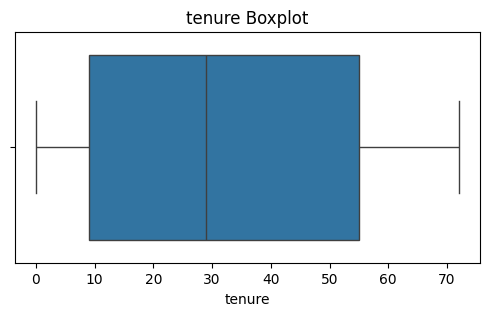

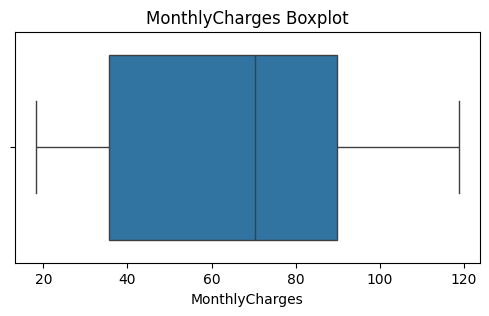

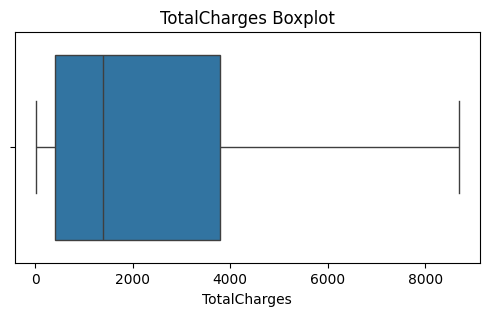

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot ilə outlier-lara baxaq
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.show()


Churn
No     5174
Yes    1869
Name: count, dtype: int64


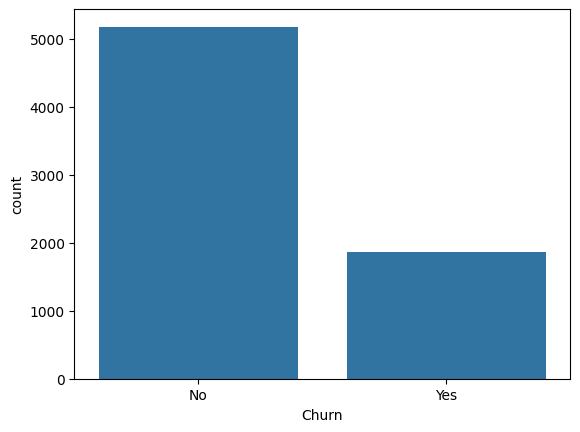

In [ ]:
# Churn balansı
print(df['Churn'].value_counts())
sns.countplot(data=df, x='Churn')
plt.show()

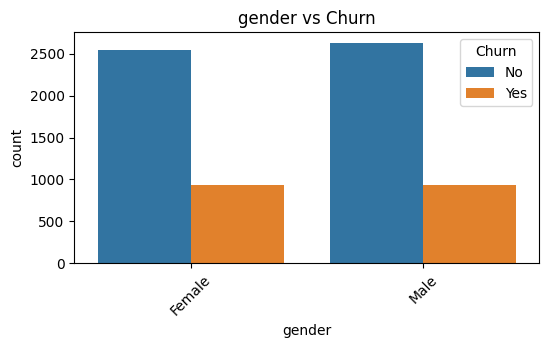

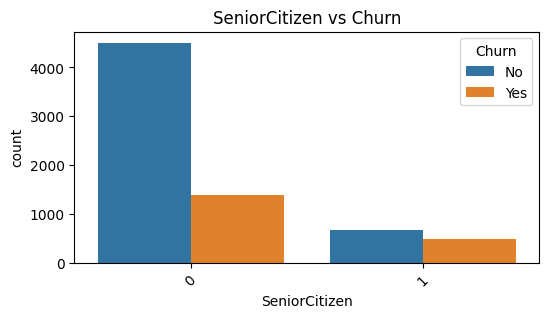

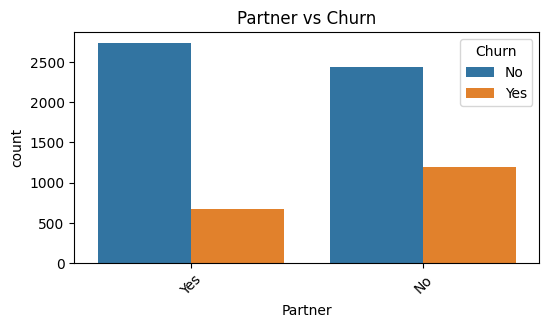

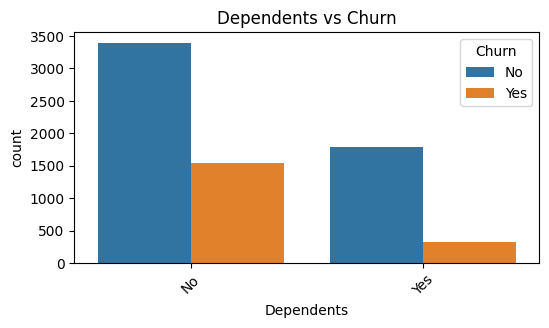

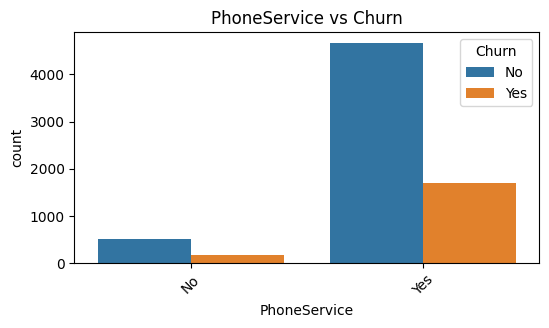

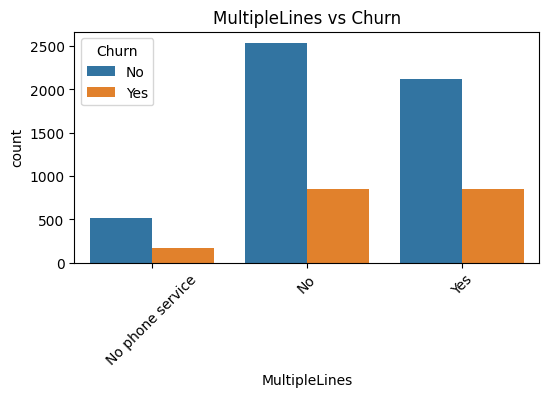

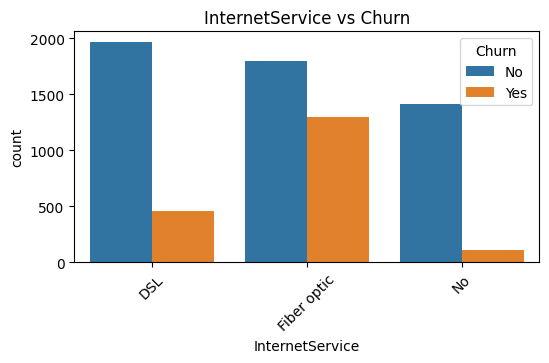

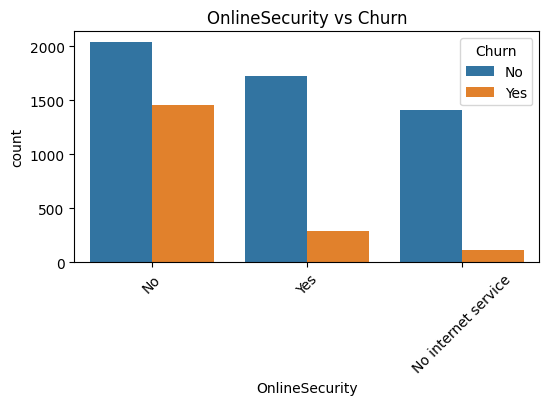

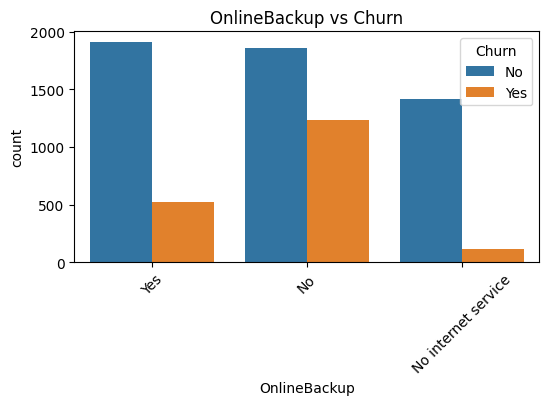

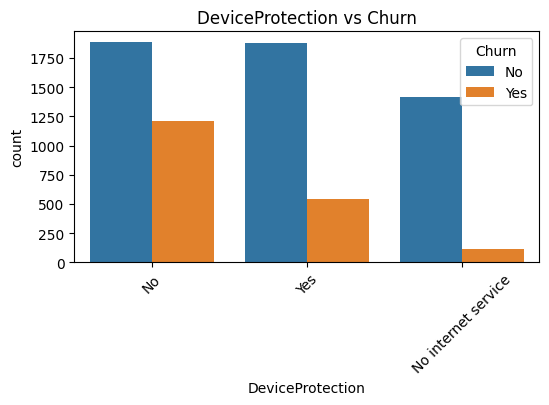

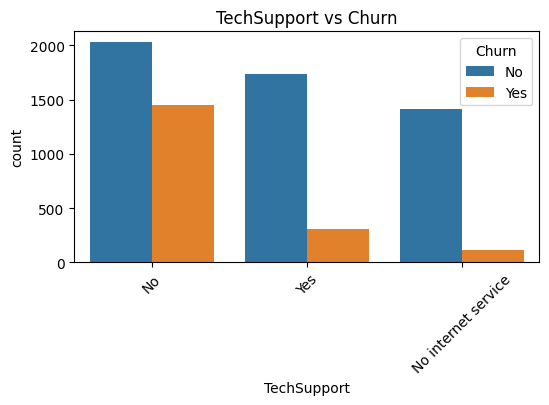

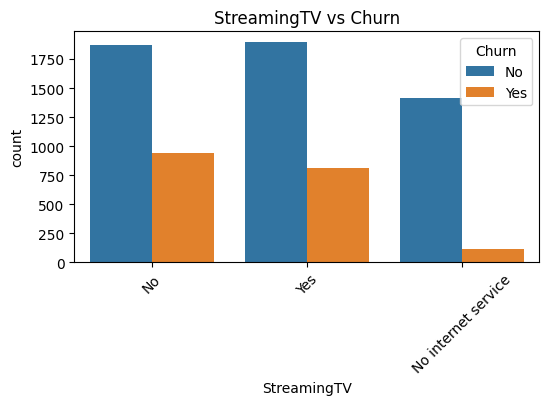

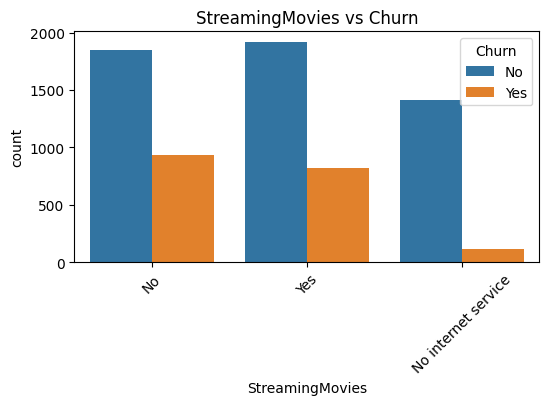

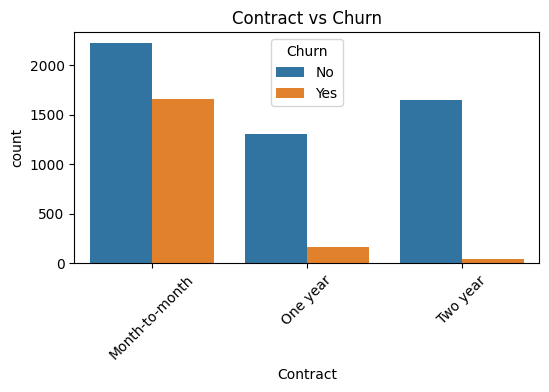

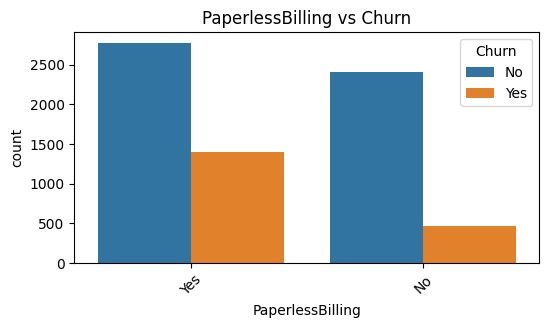

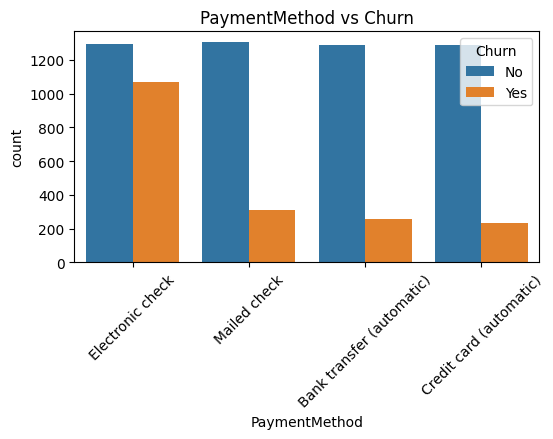

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kateqorik sütunları seçək
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Hər kateqorik dəyişən üçün countplot
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


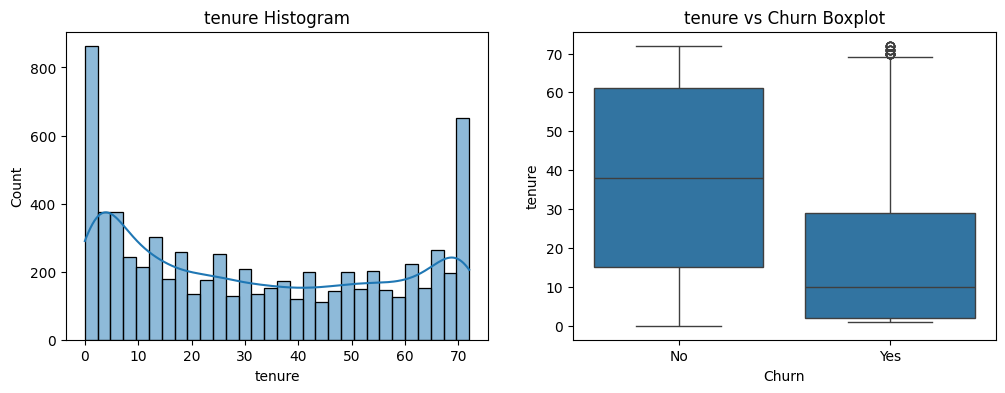

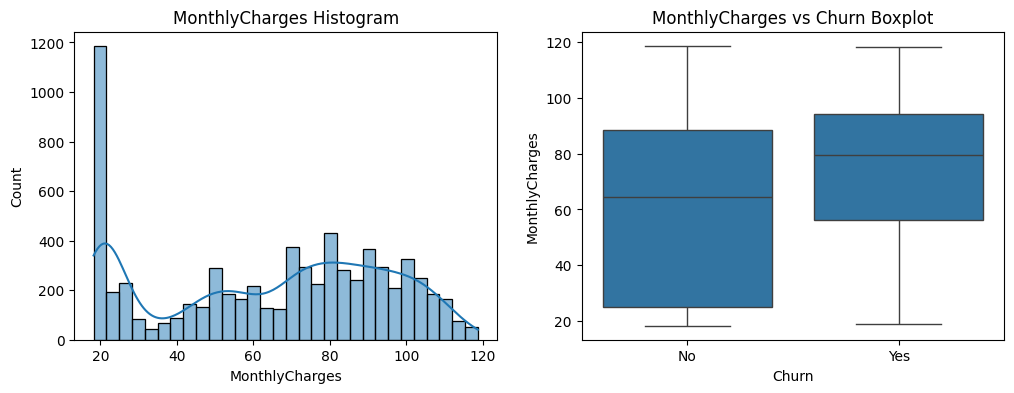

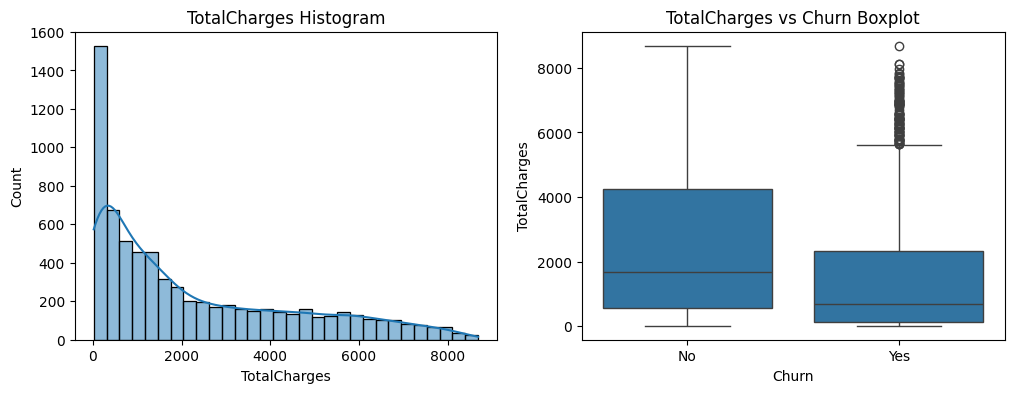

In [ ]:
# Sayısal sütunlar
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Histogram və boxplot ilə paylanma
for col in numeric_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Histogram')

    plt.subplot(1,2,2)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn Boxplot')

    plt.show()


In [ ]:
# Ortalama dəyərlər churn-a görə
df.groupby('Churn')[numeric_cols].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2555.344141
Yes,17.979133,74.441332,1531.796094


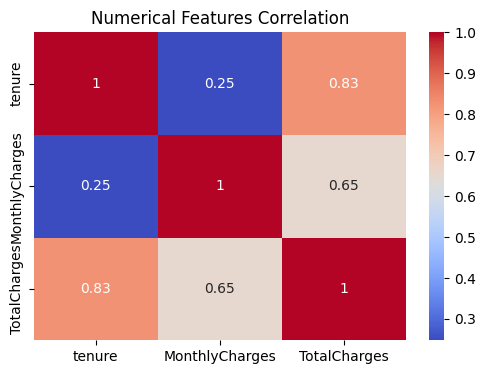

In [ ]:
# Sayısal sütunlar arasında korelasiya
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numerical Features Correlation')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Kateqorik sütunlar (churn xaric)
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


In [ ]:
# Hədəf dəyişən
y = df_encoded['Churn'].apply(lambda x: 1 if x=='Yes' else 0)  # Churn: Yes->1, No->0

# X xüsusiyyətləri
X = df_encoded.drop(['customerID', 'Churn'], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#4cu hisse
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modeli qur
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Proqnozlar
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:,1]  # ROC-AUC üçün ehtimallar



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")


Accuracy: 0.7906316536550745
Precision: 0.6312292358803987
Recall: 0.5080213903743316
F1-score: 0.562962962962963
ROC-AUC: 0.8252460668061692


In [ ]:
baseline_results = {
    'Model': 'RandomForest (Baseline)',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'ROC-AUC': roc_auc
}

print(baseline_results)


{'Model': 'RandomForest (Baseline)', 'Accuracy': 0.7906316536550745, 'Precision': 0.6312292358803987, 'Recall': 0.5080213903743316, 'F1-score': 0.562962962962963, 'ROC-AUC': np.float64(0.8252460668061692)}


In [ ]:
!pip install scikit-optimize


In [ ]:
#5ci hisse
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score

In [ ]:
# Hiperparametr sahəsi
param_space = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(5, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Real(0.1, 1.0, prior='uniform')
}


In [ ]:
# ROC-AUC skoru əsas götürüləcək
rf = RandomForestClassifier(random_state=42)

bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=30,                # iterasiya sayı
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

bayes_search.fit(X_train, y_train)


BayesSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
              n_iter=30, n_jobs=-1, random_state=42, scoring='roc_auc',
              search_spaces={'max_depth': Integer(low=5, high=50, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.1, high=1.0, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')})

In [ ]:
print("Ən yaxşı parametrlər:", bayes_search.best_params_)

# Ən yaxşı parametrlərlə modeli qur
best_rf = bayes_search.best_estimator_

# Test setdə performans
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:,1]

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_proba_best)

tuned_results = {
    'Model': 'RandomForest (Tuned)',
    'Accuracy': accuracy_best,
    'Precision': precision_best,
    'Recall': recall_best,
    'F1-score': f1_best,
    'ROC-AUC': roc_auc_best
}

print(tuned_results)


Ən yaxşı parametrlər: OrderedDict({'max_depth': 50, 'max_features': 0.20824413855816548, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 500})
{'Model': 'RandomForest (Tuned)', 'Accuracy': 0.8034066713981547, 'Precision': 0.6678200692041523, 'Recall': 0.516042780748663, 'F1-score': 0.5822021116138764, 'ROC-AUC': np.float64(0.8448577850112378)}


In [ ]:
import pandas as pd

comparison = pd.DataFrame([baseline_results, tuned_results])
print(comparison)


                     Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  RandomForest (Baseline)  0.790632   0.631229  0.508021  0.562963  0.825246
1     RandomForest (Tuned)  0.803407   0.667820  0.516043  0.582202  0.844858


In [ ]:
!pip install xgboost lightgbm catboost scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}


In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    })


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:12:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


In [ ]:
import pandas as pd

comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values(by='ROC-AUC', ascending=False)
print(comparison_df)


          Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
3      CatBoost  0.801987   0.654723  0.537433  0.590308  0.841576
2      LightGBM  0.794180   0.631250  0.540107  0.582133  0.834142
0  RandomForest  0.790632   0.631229  0.508021  0.562963  0.825246
1       XGBoost  0.779276   0.600639  0.502674  0.547307  0.819530


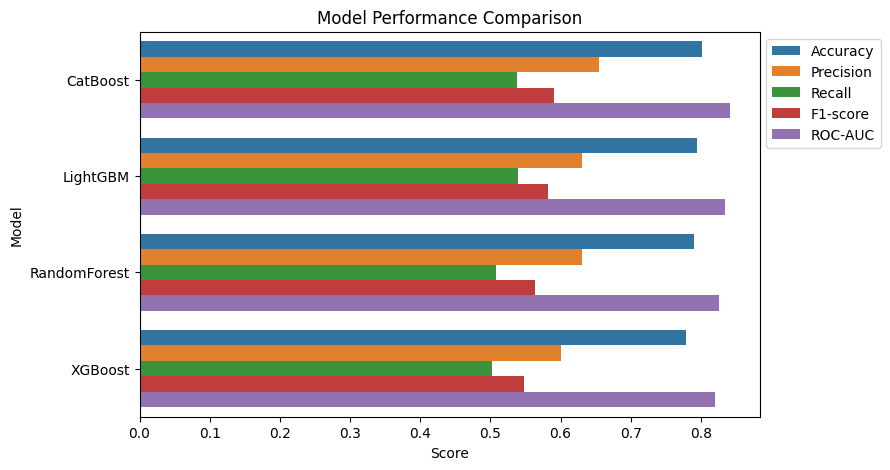

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=comparison_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']),
            x='value', y='Model', hue='variable')
plt.title('Model Performance Comparison')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
import joblib

# Məsələn, ən yaxşı nəticə verən model CatBoost olubsa:
best_model = models['CatBoost']   # buraya ən yaxşı modeli yazırsan

# Modeli saxla
joblib.dump(best_model, "best_model.pkl")

print("✅ Model uğurla 'best_model.pkl' kimi saxlanıldı.")


✅ Model uğurla 'best_model.pkl' kimi saxlanıldı.


In [ ]:
# Modeli yüklə
loaded_model = joblib.load("best_model.pkl")

# İstifadə nümunəsi
sample_pred = loaded_model.predict(X_test[:5])
print("Nümunə proqnozlar:", sample_pred)


Nümunə proqnozlar: [0 1 0 0 0]


In [ ]:
joblib.dump(best_model, "catboost_best_model_2025.pkl")


['catboost_best_model_2025.pkl']

In [ ]:
import pandas as pd

# Əgər əvvəl yığdığımız results siyahısı varsa:
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.round(4).sort_values(by="ROC-AUC", ascending=False)
display(comparison_df)


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
3,CatBoost,0.8020,0.6547,0.5374,0.5903,0.8416
2,LightGBM,0.7942,0.6312,0.5401,0.5821,0.8341
0,RandomForest,0.7906,0.6312,0.5080,0.5630,0.8252
1,XGBoost,0.7793,0.6006,0.5027,0.5473,0.8195


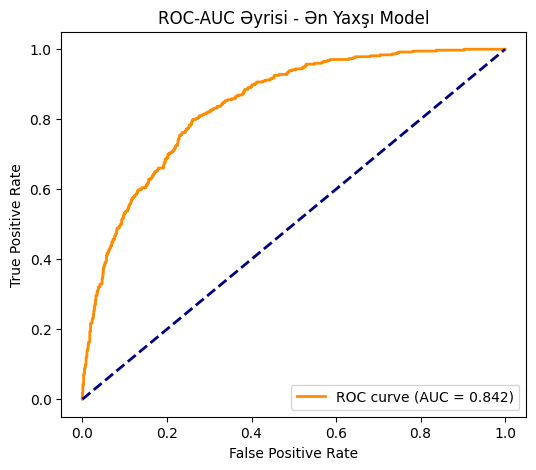

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ən yaxşı modeli seçək (məsələn, CatBoost)
best_model = models['CatBoost']
y_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC-AUC Əyrisi - Ən Yaxşı Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


/tmp/ipython-input-1007396874.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


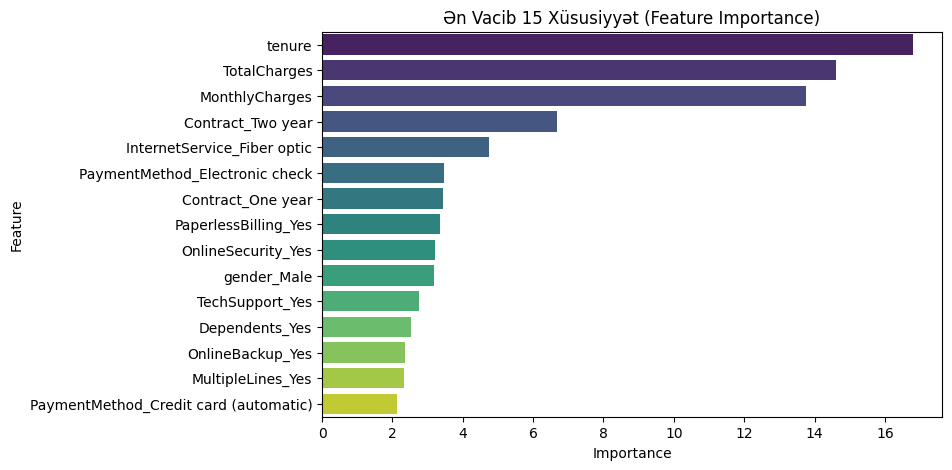

In [ ]:
import seaborn as sns

# CatBoost, LightGBM və RandomForest üçün feature_importances_ atributu var
importances = best_model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title('Ən Vacib 15 Xüsusiyyət (Feature Importance)')
plt.show()


In [ ]:
compare_baseline = pd.DataFrame([baseline_results, tuned_results]).round(4)
print(compare_baseline)


                     Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0  RandomForest (Baseline)    0.7906     0.6312   0.508    0.5630   0.8252
1     RandomForest (Tuned)    0.8034     0.6678   0.516    0.5822   0.8449


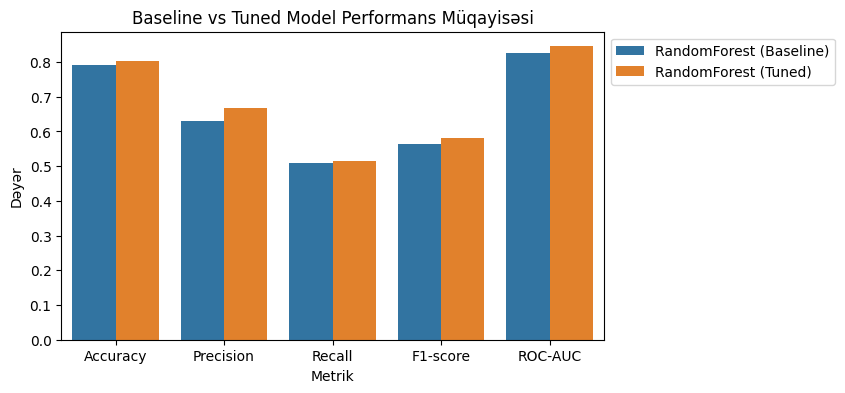

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=compare_baseline.melt(id_vars='Model'), x='variable', y='value', hue='Model')
plt.title('Baseline vs Tuned Model Performans Müqayisəsi')
plt.ylabel('Dəyər')
plt.xlabel('Metrik')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
